In [36]:
# Practice Question
# 1. Download the wine dataset (wine_modified.csv) from github
# 2. Load the wine data in ipython notebook
# 3. Clean the data and deal with the missing values (Multiple correct ways to do this)
# 4. Compute mean and standard deviation of attributes in processed data
# 5. Download the original wine dataset (wine_original.csv) from github and 
#    compare the mean/standard deviation in step 4 with that of the original dataset
# 6. Perform relevant visualizations (You can use scatter() to create plots and 
#    give different colors for different classes)

In [37]:
# Data Description
# 1. Multiclass classification problem with 3 classes: {1,2,3} representing 3 different cultivators
# 2. 13 continuous attributes
# 3. UCI Machine Learning Repository

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [39]:
processed_df = pd.read_csv('wine_modified.csv')

In [40]:
processed_df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.230,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,1.0,13.200,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,1.0,13.160,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,1.0,14.370,NaN,2.50,NaN,NaN,3.85,NaN,NaN,NaN,7.800000,NaN,NaN,NaN
4,1.0,13.240,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,1.0,14.200,1.76,NaN,15.2,112.0,3.27,NaN,0.34,1.97,6.750000,1.05,2.85,1450.0
6,1.0,14.390,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,1.0,14.060,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,1.0,14.830,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,1.0,13.860,1.35,NaN,16.0,98.0,2.98,NaN,0.22,1.85,7.220000,1.01,3.55,1045.0


In [41]:
processed_df.isnull().sum()

class                    10
Alcohol                   0
Malic acid               12
Ash                     112
Alcalinity of ash        12
Magnesium                22
Total phenols             0
Flavanoids               48
Nonflavanoid phenols     14
Proanthocyanins          12
Color intensity          12
Hue                      14
OD280/OD315              11
Proline                  14
dtype: int64

In [42]:
processed_df[processed_df.isnull().sum(axis=1)>7]

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
3,1.0,14.37,NaN,2.5,NaN,NaN,3.85,NaN,NaN,NaN,7.80,NaN,NaN,NaN
31,1.0,13.58,NaN,NaN,NaN,NaN,2.86,NaN,NaN,NaN,6.90,1.09,NaN,NaN
32,1.0,13.68,NaN,NaN,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1.0,13.07,NaN,NaN,15.5,NaN,2.40,NaN,NaN,1.37,NaN,NaN,NaN,NaN
40,1.0,13.56,NaN,NaN,NaN,117.0,3.15,NaN,NaN,NaN,NaN,NaN,3.38,NaN
44,1.0,13.05,NaN,NaN,NaN,NaN,3.00,NaN,0.28,NaN,NaN,NaN,NaN,NaN
54,1.0,13.74,NaN,NaN,16.4,NaN,2.60,2.90,NaN,NaN,NaN,NaN,NaN,NaN
64,2.0,12.17,1.45,NaN,NaN,NaN,1.89,1.75,NaN,NaN,NaN,NaN,NaN,NaN
66,2.0,13.11,NaN,1.7,NaN,NaN,2.98,NaN,NaN,2.28,NaN,NaN,NaN,NaN
74,2.0,11.96,1.09,NaN,NaN,NaN,3.38,NaN,NaN,NaN,3.21,NaN,NaN,NaN


In [43]:
# Remove rows with >=7 cols NAN
processed_df = processed_df[processed_df.isnull().sum(axis=1)<8]

In [44]:
processed_df.isnull().sum()

class                    9
Alcohol                  0
Malic acid               0
Ash                     99
Alcalinity of ash        0
Magnesium                9
Total phenols            0
Flavanoids              35
Nonflavanoid phenols     0
Proanthocyanins          0
Color intensity          0
Hue                      0
OD280/OD315              0
Proline                  0
dtype: int64

In [45]:
# Delete columns with high number of missing values
del processed_df['Ash']

In [46]:
# Delete rows with labels missing
processed_df = processed_df[processed_df['class'].notnull()]

In [47]:
processed_df.corr()['Magnesium']

class                  -0.175987
Alcohol                 0.091846
Malic acid             -0.036010
Alcalinity of ash      -0.103008
Magnesium               1.000000
Total phenols           0.184480
Flavanoids              0.130853
Nonflavanoid phenols   -0.281239
Proanthocyanins         0.241854
Color intensity         0.181349
Hue                     0.065842
OD280/OD315             0.065337
Proline                 0.398554
Name: Magnesium, dtype: float64

In [48]:
# Fill mean
avg = processed_df['Magnesium'].mean()
processed_df['Magnesium'] = processed_df['Magnesium'].fillna(avg)

In [49]:
processed_df.corr()['Flavanoids']

class                  -0.806180
Alcohol                 0.009881
Malic acid             -0.342438
Alcalinity of ash      -0.237431
Magnesium               0.121877
Total phenols           0.867667
Flavanoids              1.000000
Nonflavanoid phenols   -0.512885
Proanthocyanins         0.654467
Color intensity        -0.256455
Hue                     0.532152
OD280/OD315             0.789279
Proline                 0.357331
Name: Flavanoids, dtype: float64

In [50]:
processed_df['Total phenols']

0      2.80
1      2.65
2      2.80
4      2.80
5      3.27
6      2.50
7      2.60
8      2.80
9      2.98
10     2.95
12     2.60
13     3.10
14     3.30
17     2.95
18     3.30
19     2.70
20     3.00
21     2.41
22     2.61
23     2.48
24     2.53
25     2.63
26     2.85
27     2.40
28     2.95
29     2.65
30     3.00
33     2.95
34     2.35
35     2.70
       ... 
144    1.38
145    1.50
146    0.98
148    1.93
150    1.40
151    1.48
152    2.20
153    1.80
154    1.48
155    1.74
156    1.80
157    1.90
158    2.80
159    2.60
160    2.30
161    1.83
162    1.65
163    1.39
164    1.35
165    1.28
166    1.70
168    1.55
169    1.98
171    1.39
172    1.68
173    1.68
174    1.80
175    1.59
176    1.65
177    2.05
Name: Total phenols, dtype: float64

In [51]:
# Nearest Neighbor

nn_train = processed_df[processed_df['Flavanoids'].notnull()][['Flavanoids', 'Total phenols', 'OD280/OD315']]
nn_test = processed_df[processed_df['Flavanoids'].isnull()][['Flavanoids', 'Total phenols', 'OD280/OD315']]

model = NearestNeighbors(n_neighbors=1).fit(nn_train[['Total phenols', 'OD280/OD315']])
distances, indices = model.kneighbors(nn_test[['Total phenols', 'OD280/OD315']])
indices = [val[0] for val in indices]

estimates = nn_train.iloc[indices]['Flavanoids'].values
processed_df.loc[processed_df['Flavanoids'].isnull(),'Flavanoids'] = estimates

In [52]:
# why Phenol and not class ?

# flav_phenol = processed_df['Flavanoids']/processed_df['Total phenols']
# ratio_mean = flav_phenol.mean()
# estimates = processed_df[processed_df['Flavanoids'].isnull()]['Total phenols']*ratio_mean
# processed_df['Flavanoids'] = processed_df['Flavanoids'].fillna(estimates)


In [53]:
processed_df.mean()

class                     1.974026
Alcohol                  12.305935
Malic acid                2.350455
Alcalinity of ash        19.645455
Magnesium                99.496552
Total phenols             2.267403
Flavanoids                1.972208
Nonflavanoid phenols      0.366753
Proanthocyanins           1.582273
Color intensity           4.982338
Hue                       0.954455
OD280/OD315               2.592013
Proline                 727.006494
dtype: float64

In [54]:
raw_df = pd.read_csv('wine_original.csv')

In [55]:
(processed_df.mean()- raw_df.mean())*100/raw_df.mean()

Alcalinity of ash       0.772050
Alcohol                -5.343461
Ash                          NaN
Color intensity        -1.497645
Flavanoids             -2.811941
Hue                    -0.312799
Magnesium              -0.245656
Malic acid              0.603773
Nonflavanoid phenols    1.353948
OD280/OD315            -0.753246
Proanthocyanins        -0.542219
Proline                -2.662598
Total phenols          -1.207338
class                   1.848297
dtype: float64

In [56]:
(processed_df.std()- raw_df.std())*100/raw_df.std()

Alcalinity of ash         3.510341
Alcohol                 368.581297
Ash                            NaN
Color intensity           0.298427
Flavanoids               -1.795841
Hue                       0.367757
Magnesium                 1.105507
Malic acid               -0.102146
Nonflavanoid phenols      2.113237
OD280/OD315               1.869110
Proanthocyanins           2.675319
Proline                  -3.770665
Total phenols            -1.376383
class                    -1.098379
dtype: float64

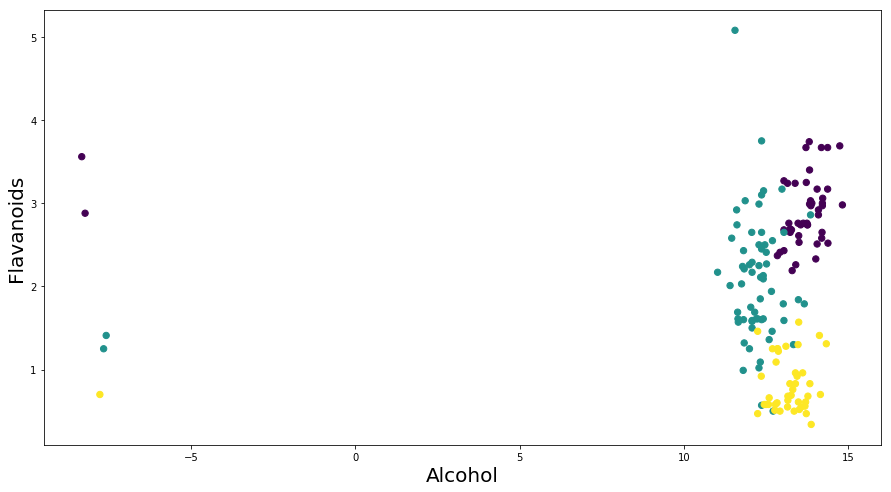

In [57]:
plt.figure(figsize=(15,8))
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Flavanoids', fontsize=20)
plt.scatter(processed_df['Alcohol'], processed_df['Flavanoids'], s=40, c=processed_df['class'])

In [58]:
# Outliers/Incorrect values
processed_df = processed_df[processed_df['Alcohol'] > 0]

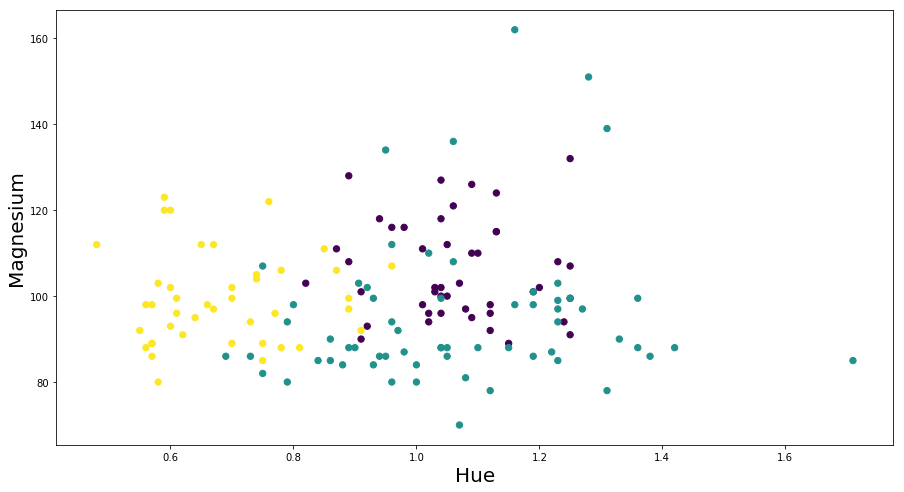

In [59]:
plt.figure(figsize=(15,8))
plt.xlabel('Hue', fontsize=20)
plt.ylabel('Magnesium', fontsize=20)
plt.scatter(processed_df['Hue'], processed_df['Magnesium'], s=40, c=processed_df['class'])

In [60]:
processed_df

,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,15.6,127.000000,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,1.0,13.20,1.78,11.2,100.000000,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,1.0,13.16,2.36,18.6,101.000000,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
4,1.0,13.24,2.59,21.0,118.000000,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,1.0,14.20,1.76,15.2,112.000000,3.27,2.58,0.34,1.97,6.750000,1.05,2.85,1450.0
6,1.0,14.39,1.87,14.6,96.000000,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,1.0,14.06,2.15,17.6,121.000000,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,1.0,14.83,1.64,14.0,97.000000,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,1.0,13.86,1.35,16.0,98.000000,2.98,3.03,0.22,1.85,7.220000,1.01,3.55,1045.0
10,1.0,14.10,2.16,18.0,99.496552,2.95,2.86,0.22,2.38,5.750000,1.25,3.17,1510.0
